#### libraries

In [1]:
# device = cuda.get_current_device()
# device.reset()

import os

from numba import cuda 

import pandas as pd
import numpy as np
from numpy import savetxt
from numpy import genfromtxt
from matplotlib import *
import matplotlib.pyplot as plt
import h5py
import math
import scipy
from scipy import ndimage
import sklearn
import seaborn as sns

import tensorflow as tf
from tensorflow import *
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

import keras
# from keras.layers import Dense
# from keras.models import Sequential
# from keras.utils import to_categorical
from keras.callbacks import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split

import skimage
from skimage import * 
%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

### Observing Learning (Accuracy & Loss) Curves

Model to recognize handwritten digits dataset, a sample dataset that comes pre-loaded with scikit learn.

The digits dataset consist of 8x8 pixel handwritten digits from 0 to 9


array([[ 0.,  1.,  9., 16., 13.,  7.,  0.,  0.],
       [ 0.,  7., 14.,  4., 10., 12.,  0.,  0.],
       [ 0.,  6., 15.,  9., 16., 11.,  0.,  0.],
       [ 0.,  0.,  9., 11.,  7., 14.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 11.,  6.,  0.],
       [ 0.,  3., 13.,  8.,  5., 14.,  5.,  0.],
       [ 0.,  0.,  9., 14., 13., 10.,  1.,  0.]])


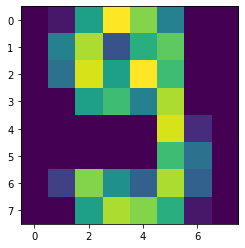

In [16]:
# data

from sklearn import datasets
digit_data = sklearn.datasets.load_digits()

X = digit_data['data']

y = digit_data['target']
y = np.reshape( y, (y.shape[0],1) )
y = keras.utils.to_categorical( y, dtype= 'float32' )

X_img = digit_data['images']

X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                     test_size= 30./100, random_state= 42 )
# data visualization
indx = 39
img_digit = X_img[indx]
print(img_digit)

img_plot = plt.imshow(img_digit)

In [17]:
# model architecture
tf.keras.backend.clear_session()

kSeqModel_1 = keras.Sequential()
num_feature = X_train.shape[1]

kSeqModel_1.add( 
                    layer= Dense( 16, activation= 'relu', input_shape= (num_feature,) )
               )
kSeqModel_1.add(
                    layer= Dense( 10, activation= 'softmax' )
)

kSeqModel_1.compile( optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'] )
kSeqModel_1.predict( x= X_train )

print(kSeqModel_1.summary())
'''Predicting on training data inputs before training can help quickly check that the model works as expected.'''

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 1,210
Trainable params: 1,210
Non-trainable params: 0
_________________________________________________________________
None


'Predicting on training data inputs before training can help quickly check that the model works as expected.'

In [18]:
# model fit
model_fit_history = kSeqModel_1.fit( x= X_train, y= y_train,
                                     verbose= 2, epochs= 20,
                                     validation_data= (X_test,y_test) )

initial_wt_learned = kSeqModel_1.get_weights()

Epoch 1/20
40/40 - 0s - loss: 8.3397 - accuracy: 0.0780 - val_loss: 4.1792 - val_accuracy: 0.1407
Epoch 2/20
40/40 - 0s - loss: 3.1741 - accuracy: 0.1790 - val_loss: 2.4414 - val_accuracy: 0.2296
Epoch 3/20
40/40 - 0s - loss: 2.1800 - accuracy: 0.2418 - val_loss: 1.9892 - val_accuracy: 0.2778
Epoch 4/20
40/40 - 0s - loss: 1.8955 - accuracy: 0.3071 - val_loss: 1.8034 - val_accuracy: 0.3241
Epoch 5/20
40/40 - 0s - loss: 1.7625 - accuracy: 0.3429 - val_loss: 1.7070 - val_accuracy: 0.3444
Epoch 6/20
40/40 - 0s - loss: 1.6796 - accuracy: 0.3715 - val_loss: 1.6323 - val_accuracy: 0.3537
Epoch 7/20
40/40 - 0s - loss: 1.6089 - accuracy: 0.3898 - val_loss: 1.5619 - val_accuracy: 0.3870
Epoch 8/20
40/40 - 0s - loss: 1.5349 - accuracy: 0.4224 - val_loss: 1.4680 - val_accuracy: 0.4519
Epoch 9/20
40/40 - 0s - loss: 1.4347 - accuracy: 0.4781 - val_loss: 1.3273 - val_accuracy: 0.5389
Epoch 10/20
40/40 - 0s - loss: 1.2814 - accuracy: 0.5434 - val_loss: 1.1737 - val_accuracy: 0.6037
Epoch 11/20
40/40 -

In [19]:
# helper function to plot accuracy

def plot_accuracy(model_history):    

    my_plot = plt.figure()
    ax = my_plot.add_subplot(111)

    plt.plot( model_history.history['accuracy'] )
    plt.plot( model_history.history['val_accuracy'] )

    ax.set_xlabel('Epoch');  ax.set_ylabel('Accuracy %')

    ax.spines['bottom'].set_color('red'); ax.spines['top'].set_color('red')
    ax.xaxis.label.set_color('red'); ax.yaxis.label.set_color('red')
    ax.tick_params(axis='x', colors='red'); ax.tick_params(axis='y', colors='red')


    plt.title( 'Model Accuracy over Training and Validation dataset' , color ='blue' )

    plt.legend( ['Train dataset', 'Validation dataset'], loc= 'upper right' )
    plt.show()
    
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

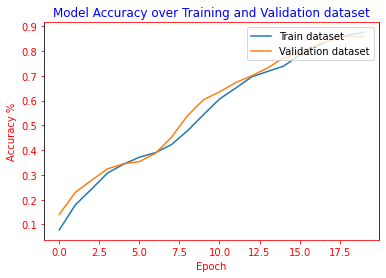

In [20]:
plot_accuracy( model_fit_history  )

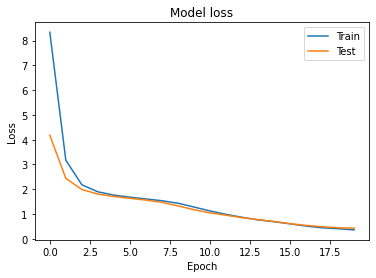

In [21]:
plot_loss( model_fit_history.history['loss'],
           model_fit_history.history['val_loss'] )

In [22]:
# Comparing model learning process using fractional data


train_Accuracy_list = []; test_Accuracy_list = []
training_sizes = np.array( [125,502,879,1255] )

for frac_size in training_sizes:
    # split the train data
    X_train_frac, _, y_train_frac, _ = train_test_split( X_train, y_train, train_size= frac_size )
    
    # set to-be-learning model's weigths to already learned weight
    kSeqModel_1.set_weights(initial_wt_learned)
    
    # fot model using fraction data
    kSeqModel_1.fit( x= X_train_frac, y= y_train_frac,
                     epochs= 1000, verbose= 0,
                     callbacks= [ EarlyStopping(monitor= 'loss', patience= 50) ]
                   )
    # get the accuracy for fractional data
    train_Accuracy = kSeqModel_1.evaluate( x= X_train_frac, y= y_train_frac, verbose= 2 )[1]
    train_Accuracy_list.append(train_Accuracy)
    
    # accuracy for test data
    test_Accuracy = kSeqModel_1.evaluate(X_test, y_test, verbose= 2)[1]
    test_Accuracy_list.append(test_Accuracy)
    
    print('Done with the size: ', frac_size); print('\n------------------------------------------------------')
    

4/4 - 0s - loss: 4.4908e-04 - accuracy: 1.0000
17/17 - 0s - loss: 0.6298 - accuracy: 0.8907
Done with the size:  125

------------------------------------------------------
16/16 - 0s - loss: 4.2887e-07 - accuracy: 1.0000
17/17 - 0s - loss: 0.2331 - accuracy: 0.9556
Done with the size:  502

------------------------------------------------------
28/28 - 0s - loss: 1.8987e-09 - accuracy: 1.0000
17/17 - 0s - loss: 0.3523 - accuracy: 0.9556
Done with the size:  879

------------------------------------------------------
40/40 - 0s - loss: 9.7451e-07 - accuracy: 1.0000
17/17 - 0s - loss: 0.3845 - accuracy: 0.9704
Done with the size:  1255

------------------------------------------------------


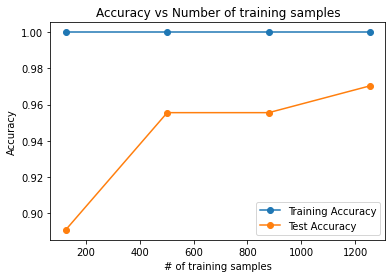

In [23]:
# helper function

def plot_results(train_accs,test_accs):
  plt.plot(training_sizes, train_accs, 'o-', label="Training Accuracy")
  plt.plot(training_sizes, test_accs, 'o-', label="Test Accuracy")
  plt.title('Accuracy vs Number of training samples')
  plt.xlabel('# of training samples')
  plt.ylabel('Accuracy')
  plt.legend( loc= "best" )
  plt.show()

plot_results( train_Accuracy_list, test_Accuracy_list  )

### Comparing different Activation functions

In [25]:
# data prep


irr_df = pd.read_csv( 'datasets/irrigation_analysis.csv', delimiter=',');  irr_df.head()

# Train/Test dataset
train_df = irr_df.sample( frac= 80./100 )
test_df = irr_df.drop( train_df.index )

print('--------------------------------------------------------------------------')
print( '\nTrain dataset: \n', test_df.head() )

# X data
x_train = train_df.drop( train_df.columns[ [0,21,22,23] ], axis= 1 ).to_numpy( dtype= 'float16' ); x_train
x_test = test_df.drop( test_df.columns[ [0,21,22,23] ], axis= 1).to_numpy( dtype= 'float16' ); x_test
print('--------------------------------------------------------------------------')
print( '\nX dataset: \n', x_train, ' ', x_train.shape )

# Y data
y_train = train_df[ ['parcel_0','parcel_1','parcel_2'] ].to_numpy( dtype= 'int' ); y_train
y_test = test_df[ ['parcel_0','parcel_1','parcel_2'] ].to_numpy( dtype= 'int' ) ; y_test

print('--------------------------------------------------------------------------')
print( '\nY dataset: \n', y_train, ' ', y_train.shape )
num_feature = x_train.shape[1]

--------------------------------------------------------------------------

Train dataset: 
     Unnamed: 0  sensor_0  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
1            1       5.0       1.0       3.0       5.0       2.0       2.0   
4            4       4.0       3.0       3.0       2.0       5.0       1.0   
17          17       1.0       1.0       3.0       4.0       0.0       2.0   
22          22       1.0       2.0       4.0       0.0       1.0       2.0   
25          25       0.0       1.0       0.0       1.0       1.0       2.0   

    sensor_6  sensor_7  sensor_8  ...  sensor_13  sensor_14  sensor_15  \
1        1.0       2.0       3.0  ...        4.0        5.0        5.0   
4        3.0       1.0       1.0  ...        1.0        3.0        2.0   
17       4.0       1.0       2.0  ...        1.0        3.0        2.0   
22       2.0       6.0       2.0  ...        3.0        1.0        0.0   
25       3.0       3.0       2.0  ...        2.0        2.0        2

In [26]:
# helper function

np.random.seed(5)

num_feature = x_train.shape[1]

# function to return the model based on provided activation function

def get_model( act_func, num_feature ):
    model = keras.Sequential()
    model.add(  layer= Dense( 4, activation= act_func, input_shape= (num_feature,) )  )
    model.add(  layer= Dense( 3, activation= 'sigmoid' )  )
    
    return (model)

In [27]:
# activation function list
act_func_list = ['relu', 'selu', 'sigmoid', 'tanh']
act_result = {}
num_feature = x_train.shape[1]

# for loop to sun model using different activation functions
for each_actFun in act_func_list:
    print('---------------------------------------------------------------------------------------------')
    print( '\nModeling using ', each_actFun, ' activation function: ')
    print('---------------------------------------------------------------------------------------------')
    
    model = get_model( act_func= each_actFun, num_feature= num_feature )
    model.compile( optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'] )
    model_history = model.fit( x= x_train, y= y_train,
                               validation_data= (x_test,y_test),
                               epochs= 200, verbose= 2
                             )
    
    act_result[each_actFun] = model_history  # appending the history set to the list
print('---------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------')
print('Modeling Complete')
print('---------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------

Modeling using  relu  activation function: 
---------------------------------------------------------------------------------------------
Epoch 1/200
50/50 - 0s - loss: 0.9921 - accuracy: 0.1587 - val_loss: 0.8142 - val_accuracy: 0.1850
Epoch 2/200
50/50 - 0s - loss: 0.7564 - accuracy: 0.2419 - val_loss: 0.6818 - val_accuracy: 0.2825
Epoch 3/200
50/50 - 0s - loss: 0.6730 - accuracy: 0.3162 - val_loss: 0.6300 - val_accuracy: 0.3525
Epoch 4/200
50/50 - 0s - loss: 0.6342 - accuracy: 0.3644 - val_loss: 0.5967 - val_accuracy: 0.3600
Epoch 5/200
50/50 - 0s - loss: 0.6072 - accuracy: 0.3700 - val_loss: 0.5707 - val_accuracy: 0.3650
Epoch 6/200
50/50 - 0s - loss: 0.5854 - accuracy: 0.3606 - val_loss: 0.5511 - val_accuracy: 0.3700
Epoch 7/200
50/50 - 0s - loss: 0.5669 - accuracy: 0.3869 - val_loss: 0.5357 - val_accuracy: 0.3975
Epoch 8/200
50/50 - 0s - loss: 0.5502 - accuracy: 0.4381 - val_loss: 0.522

Epoch 81/200
50/50 - 0s - loss: 0.2582 - accuracy: 0.5962 - val_loss: 0.2524 - val_accuracy: 0.6525
Epoch 82/200
50/50 - 0s - loss: 0.2577 - accuracy: 0.6037 - val_loss: 0.2504 - val_accuracy: 0.6425
Epoch 83/200
50/50 - 0s - loss: 0.2564 - accuracy: 0.5969 - val_loss: 0.2489 - val_accuracy: 0.6225
Epoch 84/200
50/50 - 0s - loss: 0.2553 - accuracy: 0.5987 - val_loss: 0.2470 - val_accuracy: 0.6225
Epoch 85/200
50/50 - 0s - loss: 0.2541 - accuracy: 0.5944 - val_loss: 0.2466 - val_accuracy: 0.6225
Epoch 86/200
50/50 - 0s - loss: 0.2534 - accuracy: 0.5863 - val_loss: 0.2472 - val_accuracy: 0.6275
Epoch 87/200
50/50 - 0s - loss: 0.2522 - accuracy: 0.5794 - val_loss: 0.2468 - val_accuracy: 0.6300
Epoch 88/200
50/50 - 0s - loss: 0.2510 - accuracy: 0.5881 - val_loss: 0.2435 - val_accuracy: 0.6175
Epoch 89/200
50/50 - 0s - loss: 0.2502 - accuracy: 0.5788 - val_loss: 0.2431 - val_accuracy: 0.6150
Epoch 90/200
50/50 - 0s - loss: 0.2495 - accuracy: 0.5813 - val_loss: 0.2441 - val_accuracy: 0.6200


Epoch 163/200
50/50 - 0s - loss: 0.2254 - accuracy: 0.5263 - val_loss: 0.2358 - val_accuracy: 0.5750
Epoch 164/200
50/50 - 0s - loss: 0.2250 - accuracy: 0.5325 - val_loss: 0.2339 - val_accuracy: 0.5650
Epoch 165/200
50/50 - 0s - loss: 0.2249 - accuracy: 0.5256 - val_loss: 0.2330 - val_accuracy: 0.5650
Epoch 166/200
50/50 - 0s - loss: 0.2255 - accuracy: 0.5337 - val_loss: 0.2338 - val_accuracy: 0.5625
Epoch 167/200
50/50 - 0s - loss: 0.2249 - accuracy: 0.5188 - val_loss: 0.2363 - val_accuracy: 0.5750
Epoch 168/200
50/50 - 0s - loss: 0.2246 - accuracy: 0.5375 - val_loss: 0.2333 - val_accuracy: 0.5400
Epoch 169/200
50/50 - 0s - loss: 0.2245 - accuracy: 0.5275 - val_loss: 0.2346 - val_accuracy: 0.5650
Epoch 170/200
50/50 - 0s - loss: 0.2250 - accuracy: 0.5319 - val_loss: 0.2337 - val_accuracy: 0.5625
Epoch 171/200
50/50 - 0s - loss: 0.2252 - accuracy: 0.5219 - val_loss: 0.2345 - val_accuracy: 0.5675
Epoch 172/200
50/50 - 0s - loss: 0.2249 - accuracy: 0.5306 - val_loss: 0.2358 - val_accurac

Epoch 43/200
50/50 - 0s - loss: 0.3352 - accuracy: 0.6050 - val_loss: 0.3330 - val_accuracy: 0.6150
Epoch 44/200
50/50 - 0s - loss: 0.3347 - accuracy: 0.6187 - val_loss: 0.3319 - val_accuracy: 0.6125
Epoch 45/200
50/50 - 0s - loss: 0.3329 - accuracy: 0.6069 - val_loss: 0.3310 - val_accuracy: 0.6250
Epoch 46/200
50/50 - 0s - loss: 0.3317 - accuracy: 0.6137 - val_loss: 0.3285 - val_accuracy: 0.5875
Epoch 47/200
50/50 - 0s - loss: 0.3302 - accuracy: 0.6137 - val_loss: 0.3277 - val_accuracy: 0.5875
Epoch 48/200
50/50 - 0s - loss: 0.3295 - accuracy: 0.6062 - val_loss: 0.3281 - val_accuracy: 0.6125
Epoch 49/200
50/50 - 0s - loss: 0.3297 - accuracy: 0.6125 - val_loss: 0.3256 - val_accuracy: 0.6075
Epoch 50/200
50/50 - 0s - loss: 0.3283 - accuracy: 0.6194 - val_loss: 0.3242 - val_accuracy: 0.5925
Epoch 51/200
50/50 - 0s - loss: 0.3272 - accuracy: 0.6150 - val_loss: 0.3235 - val_accuracy: 0.6025
Epoch 52/200
50/50 - 0s - loss: 0.3267 - accuracy: 0.6150 - val_loss: 0.3231 - val_accuracy: 0.6125


Epoch 125/200
50/50 - 0s - loss: 0.2824 - accuracy: 0.6531 - val_loss: 0.2748 - val_accuracy: 0.6525
Epoch 126/200
50/50 - 0s - loss: 0.2807 - accuracy: 0.6631 - val_loss: 0.2751 - val_accuracy: 0.6650
Epoch 127/200
50/50 - 0s - loss: 0.2794 - accuracy: 0.6581 - val_loss: 0.2749 - val_accuracy: 0.6850
Epoch 128/200
50/50 - 0s - loss: 0.2781 - accuracy: 0.6706 - val_loss: 0.2747 - val_accuracy: 0.6425
Epoch 129/200
50/50 - 0s - loss: 0.2772 - accuracy: 0.6650 - val_loss: 0.2709 - val_accuracy: 0.6450
Epoch 130/200
50/50 - 0s - loss: 0.2768 - accuracy: 0.6700 - val_loss: 0.2708 - val_accuracy: 0.6650
Epoch 131/200
50/50 - 0s - loss: 0.2756 - accuracy: 0.6700 - val_loss: 0.2699 - val_accuracy: 0.6775
Epoch 132/200
50/50 - 0s - loss: 0.2750 - accuracy: 0.6706 - val_loss: 0.2676 - val_accuracy: 0.6500
Epoch 133/200
50/50 - 0s - loss: 0.2736 - accuracy: 0.6725 - val_loss: 0.2686 - val_accuracy: 0.6625
Epoch 134/200
50/50 - 0s - loss: 0.2727 - accuracy: 0.6687 - val_loss: 0.2661 - val_accurac

Epoch 3/200
50/50 - 0s - loss: 0.5778 - accuracy: 0.6525 - val_loss: 0.5613 - val_accuracy: 0.6525
Epoch 4/200
50/50 - 0s - loss: 0.5672 - accuracy: 0.6144 - val_loss: 0.5511 - val_accuracy: 0.6175
Epoch 5/200
50/50 - 0s - loss: 0.5569 - accuracy: 0.6125 - val_loss: 0.5411 - val_accuracy: 0.6325
Epoch 6/200
50/50 - 0s - loss: 0.5465 - accuracy: 0.6375 - val_loss: 0.5316 - val_accuracy: 0.6350
Epoch 7/200
50/50 - 0s - loss: 0.5374 - accuracy: 0.6350 - val_loss: 0.5230 - val_accuracy: 0.6400
Epoch 8/200
50/50 - 0s - loss: 0.5294 - accuracy: 0.6331 - val_loss: 0.5151 - val_accuracy: 0.6575
Epoch 9/200
50/50 - 0s - loss: 0.5220 - accuracy: 0.6400 - val_loss: 0.5078 - val_accuracy: 0.6700
Epoch 10/200
50/50 - 0s - loss: 0.5149 - accuracy: 0.6419 - val_loss: 0.5005 - val_accuracy: 0.6700
Epoch 11/200
50/50 - 0s - loss: 0.5082 - accuracy: 0.6525 - val_loss: 0.4935 - val_accuracy: 0.6500
Epoch 12/200
50/50 - 0s - loss: 0.5019 - accuracy: 0.6450 - val_loss: 0.4866 - val_accuracy: 0.6550
Epoch 1

Epoch 85/200
50/50 - 0s - loss: 0.3271 - accuracy: 0.7050 - val_loss: 0.3213 - val_accuracy: 0.7450
Epoch 86/200
50/50 - 0s - loss: 0.3262 - accuracy: 0.6944 - val_loss: 0.3204 - val_accuracy: 0.7425
Epoch 87/200
50/50 - 0s - loss: 0.3250 - accuracy: 0.7025 - val_loss: 0.3203 - val_accuracy: 0.7475
Epoch 88/200
50/50 - 0s - loss: 0.3246 - accuracy: 0.6981 - val_loss: 0.3195 - val_accuracy: 0.7425
Epoch 89/200
50/50 - 0s - loss: 0.3238 - accuracy: 0.7006 - val_loss: 0.3185 - val_accuracy: 0.7450
Epoch 90/200
50/50 - 0s - loss: 0.3227 - accuracy: 0.6988 - val_loss: 0.3179 - val_accuracy: 0.7450
Epoch 91/200
50/50 - 0s - loss: 0.3218 - accuracy: 0.6981 - val_loss: 0.3169 - val_accuracy: 0.7425
Epoch 92/200
50/50 - 0s - loss: 0.3209 - accuracy: 0.6938 - val_loss: 0.3170 - val_accuracy: 0.7475
Epoch 93/200
50/50 - 0s - loss: 0.3201 - accuracy: 0.6981 - val_loss: 0.3159 - val_accuracy: 0.7450
Epoch 94/200
50/50 - 0s - loss: 0.3195 - accuracy: 0.7056 - val_loss: 0.3152 - val_accuracy: 0.7450


Epoch 167/200
50/50 - 0s - loss: 0.2683 - accuracy: 0.7169 - val_loss: 0.2689 - val_accuracy: 0.7525
Epoch 168/200
50/50 - 0s - loss: 0.2680 - accuracy: 0.7206 - val_loss: 0.2679 - val_accuracy: 0.7525
Epoch 169/200
50/50 - 0s - loss: 0.2679 - accuracy: 0.7188 - val_loss: 0.2671 - val_accuracy: 0.7450
Epoch 170/200
50/50 - 0s - loss: 0.2674 - accuracy: 0.7206 - val_loss: 0.2667 - val_accuracy: 0.7475
Epoch 171/200
50/50 - 0s - loss: 0.2669 - accuracy: 0.7181 - val_loss: 0.2674 - val_accuracy: 0.7500
Epoch 172/200
50/50 - 0s - loss: 0.2668 - accuracy: 0.7181 - val_loss: 0.2661 - val_accuracy: 0.7475
Epoch 173/200
50/50 - 0s - loss: 0.2659 - accuracy: 0.7219 - val_loss: 0.2656 - val_accuracy: 0.7475
Epoch 174/200
50/50 - 0s - loss: 0.2657 - accuracy: 0.7194 - val_loss: 0.2657 - val_accuracy: 0.7475
Epoch 175/200
50/50 - 0s - loss: 0.2651 - accuracy: 0.7244 - val_loss: 0.2659 - val_accuracy: 0.7475
Epoch 176/200
50/50 - 0s - loss: 0.2650 - accuracy: 0.7212 - val_loss: 0.2645 - val_accurac

Epoch 43/200
50/50 - 0s - loss: 0.3401 - accuracy: 0.5669 - val_loss: 0.3287 - val_accuracy: 0.5925
Epoch 44/200
50/50 - 0s - loss: 0.3383 - accuracy: 0.5869 - val_loss: 0.3277 - val_accuracy: 0.5825
Epoch 45/200
50/50 - 0s - loss: 0.3364 - accuracy: 0.5950 - val_loss: 0.3257 - val_accuracy: 0.5775
Epoch 46/200
50/50 - 0s - loss: 0.3350 - accuracy: 0.5713 - val_loss: 0.3247 - val_accuracy: 0.5875
Epoch 47/200
50/50 - 0s - loss: 0.3331 - accuracy: 0.5806 - val_loss: 0.3247 - val_accuracy: 0.5825
Epoch 48/200
50/50 - 0s - loss: 0.3315 - accuracy: 0.5781 - val_loss: 0.3229 - val_accuracy: 0.5875
Epoch 49/200
50/50 - 0s - loss: 0.3303 - accuracy: 0.5663 - val_loss: 0.3218 - val_accuracy: 0.5950
Epoch 50/200
50/50 - 0s - loss: 0.3285 - accuracy: 0.5825 - val_loss: 0.3200 - val_accuracy: 0.5850
Epoch 51/200
50/50 - 0s - loss: 0.3267 - accuracy: 0.5706 - val_loss: 0.3194 - val_accuracy: 0.5775
Epoch 52/200
50/50 - 0s - loss: 0.3253 - accuracy: 0.5681 - val_loss: 0.3185 - val_accuracy: 0.5925


Epoch 125/200
50/50 - 0s - loss: 0.2642 - accuracy: 0.5525 - val_loss: 0.2759 - val_accuracy: 0.5825
Epoch 126/200
50/50 - 0s - loss: 0.2644 - accuracy: 0.5581 - val_loss: 0.2723 - val_accuracy: 0.5900
Epoch 127/200
50/50 - 0s - loss: 0.2638 - accuracy: 0.5556 - val_loss: 0.2710 - val_accuracy: 0.5825
Epoch 128/200
50/50 - 0s - loss: 0.2623 - accuracy: 0.5569 - val_loss: 0.2719 - val_accuracy: 0.5700
Epoch 129/200
50/50 - 0s - loss: 0.2618 - accuracy: 0.5556 - val_loss: 0.2701 - val_accuracy: 0.5675
Epoch 130/200
50/50 - 0s - loss: 0.2616 - accuracy: 0.5444 - val_loss: 0.2709 - val_accuracy: 0.5825
Epoch 131/200
50/50 - 0s - loss: 0.2610 - accuracy: 0.5581 - val_loss: 0.2689 - val_accuracy: 0.5625
Epoch 132/200
50/50 - 0s - loss: 0.2603 - accuracy: 0.5475 - val_loss: 0.2719 - val_accuracy: 0.5750
Epoch 133/200
50/50 - 0s - loss: 0.2604 - accuracy: 0.5556 - val_loss: 0.2707 - val_accuracy: 0.5925
Epoch 134/200
50/50 - 0s - loss: 0.2605 - accuracy: 0.5562 - val_loss: 0.2685 - val_accurac

In [28]:
# acc_result structure
print(act_result, '\n\n',      
                            act_result['relu'].history.keys()  )

{'relu': <tensorflow.python.keras.callbacks.History object at 0x0000017925D8D7F0>,
 'selu': <tensorflow.python.keras.callbacks.History object at 0x0000017925EDFE10>,
 'sigmoid': <tensorflow.python.keras.callbacks.History object at 0x000001792600F240>,
 'tanh': <tensorflow.python.keras.callbacks.History object at 0x000001792657B630>} 

 ['loss', 'accuracy', 'val_loss', 'val_accuracy']


In [29]:
validation_data = np.zeros( 
    shape = ( len(act_result['relu'].history['val_accuracy']), 8)
)
col_num = 0

for each_key_af in act_result:
    print('\n\n', each_key_af, ':\n')
    
    for each_paras in act_result[each_key_af].history:
        print(each_paras)
#         print(act_result[each_key_af].history[each_paras])
        if each_paras == 'val_loss':  # only for val loss & val_accuracy
            validation_data[:,col_num] = act_result[each_key_af].history[each_paras] 
            col_num += 1
        elif each_paras == 'val_accuracy':
            validation_data[:,col_num] = act_result[each_key_af].history[each_paras]
            col_num += 1
            
# convert the np into pd
loss_val = pd.DataFrame(data= validation_data[:,[0,2,4,6]])
accuracy_val = pd.DataFrame( data= validation_data[:,[1,3,5,7]] )

loss_val.columns = ['relu', 'selu', 'sigmoid', 'tanh']
accuracy_val.columns = ['relu', 'selu', 'sigmoid', 'tanh']



 relu :

loss
accuracy
val_loss
val_accuracy


 selu :

loss
accuracy
val_loss
val_accuracy


 sigmoid :

loss
accuracy
val_loss
val_accuracy


 tanh :

loss
accuracy
val_loss
val_accuracy


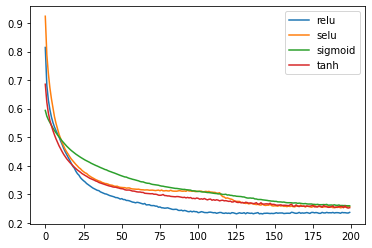

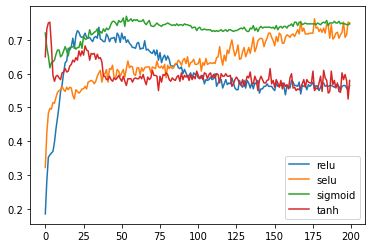

In [30]:
# plot the loss and accuracy

loss_val.plot(); plt.show()
accuracy_val.plot(); plt.show()